In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import random
import patsy
import sklearn.linear_model as linear

sns.set(style="whitegrid")

# Linear Regression

In [4]:
np.random.seed(8472385)

In [5]:
data = {}
data["x"] = stats.norm.rvs(10.0, 1, 100)
data["e"] = stats.norm.rvs(0, 1, 100)
data["y"] = data["x"] * 2.5 + data["e"]
data = pd.DataFrame(data)

In [6]:
import models

In [7]:
result = models.bootstrap_linear_regression("y ~ x", data=data)
models.describe_bootstrap_lr(result)

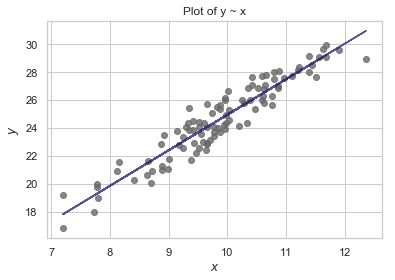

In [8]:
figure = plt.figure(figsize=(6,4))

axes = figure.add_subplot(1, 1, 1)
axes.scatter(data.x, data.y, color="dimgray", alpha=0.8)

beta = result[ "coefficients"]
axes.plot(data.x, [beta[ 0] + beta[ 1] * x for x in data.x], '-', color="midnightblue", alpha=0.75)

axes.set_ylabel(r"$y$")
axes.set_xlabel(r"$x$")
axes.set_title("Plot of {0}".format(result['formula']))

plt.show()
plt.close()

In [9]:
child_iq = pd.read_csv( "child_iq.tsv", sep="\t")

In [10]:
result = models.bootstrap_linear_regression("child_iq ~ mom_hs + mom_iq + mom_hs:mom_iq", data=child_iq)
models.describe_bootstrap_lr(result)

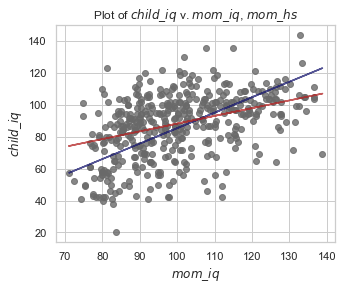

In [11]:
figure = plt.figure(figsize=(5,4))

axes = figure.add_subplot(1, 1, 1)
axes.scatter( child_iq.mom_iq, child_iq.child_iq, color="dimgray", alpha=0.8)

beta = result[ "coefficients"]
axes.plot(child_iq.mom_iq, [beta[ 0] + beta[ 2] * x for x in child_iq.mom_iq], '-', color="midnightblue", alpha=0.75)
axes.plot(child_iq.mom_iq, [(beta[ 0] + beta[1]) + (beta[ 2] + beta[3]) * x for x in child_iq.mom_iq], '-', color="firebrick", alpha=0.75)

axes.set_ylabel(r"$child\_iq$")
axes.set_xlabel(r"$mom\_iq$")
axes.set_title(r"Plot of $child\_iq$ v. $mom\_iq$, $mom\_hs$")

plt.show()
plt.close()

In [12]:
houses = pd.read_csv( "kc_house_data.csv")

In [13]:
result = models.bootstrap_linear_regression("price ~ sqft_living", data=houses)
models.describe_bootstrap_lr(result)

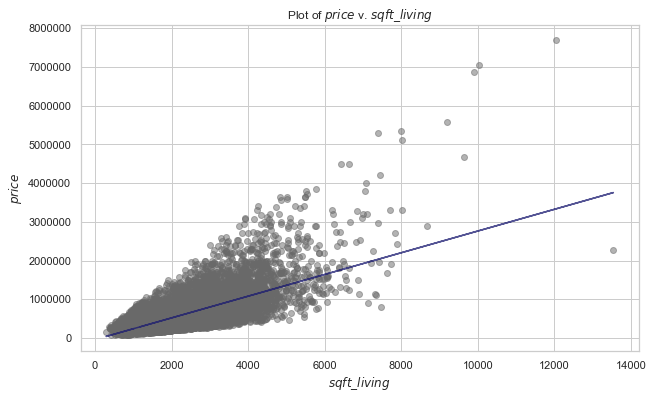

In [15]:
figure = plt.figure(figsize=(10,6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter( houses.sqft_living, houses.price, color="dimgray", alpha=0.5)

beta = result[ "coefficients"]
axes.plot(houses.sqft_living, [beta[ 0] + beta[ 1] * x for x in houses.sqft_living], '-', color="midnightblue", alpha=0.75)

axes.set_ylabel(r"$price$")
axes.set_xlabel(r"$sqft\_living$")
axes.set_title(r"Plot of $price$ v. $sqft\_living$")

plt.show()
plt.close()